# Introduction to NumPy

Lots of these notes are from Chapter 2 of VanderPlas -- you should definitely go through his chapter carefully.  I will use the book notes and these in class.

The NumPy documentation: https://docs.scipy.org/doc/numpy/

In [1]:
# import the NumPy module and display the version number
import numpy as np
np.__version__

# Create a function to display the array attributes and data (optinally).  
#  Note the use of the default value for the show_data parameter.  Made
#  this part of the display optional (and off by default) to support large
#  arrays (that you wouldn't want to try to show explicitly)
def show(the_array, show_data = 0):
    print("  Dimension: {:}".format(the_array.ndim))
    print("       Size: {:}".format(the_array.size))
    print("      Shape: {:}".format(the_array.shape))    
    print("  Data Type: {:}".format(the_array.dtype))    
    print("  Item Size: {:}".format(the_array.itemsize))
    print("Data Buffer: {:}".format(the_array.data))
    if show_data:
        print(the_array)

## NumPy Arrays
### Creating Arrays and Access Elements

In [ ]:
# Create a NumPy array from a list
a = np.array([1.5, 0.7, 22.4])
show(a, 1)

In [ ]:
# The second element
a[1]

In [ ]:
# Multi-dimensional array.  Note that NumPy arrays are homogenous -- all
#   elements are the same data type (dtype) -- integers in this case
b = np.array(
    [ [1,  2,  3,  4,   5]
     ,[6,  7,  8,  9,  10]
     ,[11, 12, 13, 14, 15] ] )
show(b, 1)

In [ ]:
# the (i, j)the element
i = 2
j = 3
b[i, j]

In [ ]:
# Note that if one elements is a float, all will be upcast since
# NumPy arrays are homogeneous
b = np.array(
    [ [1.0,  2,  3,  4,   5]
     ,[6,  7,  8,  9,  10]
     ,[11, 12, 13, 14, 15] ] )
show(b,1)
# since Python lists are heterogeneous (in data types), there
# is no upcasting and a similar definition would have a list of lists
# with 1 float and the rest integers.

In [ ]:
# zeros to create and array and initialize with zeros. Ones() works similarly.
c = np.zeros((3, 8), dtype=int)
show(c, 1)

In [ ]:
# full() for arbitrary values
c = np.full((3, 3, 3), 82.6)
show(c, 1)

In [ ]:
# Create a NumPy array and initialize it with integers from 0 - 14 using
#   the arange() function.
a = np.arange(15)
show(a, 1)

In [ ]:
# Create the same array, but then reshape it to a 3x5 matrix (a 
#   2-dimensional array, technically)
a = np.arange(15).reshape(3,5)
show(a, 1)

In [ ]:
# Create a 20-element array of floats form 0 - 19 and reshape it to a 5x4 array.
# Note that we create an anonymous array and send that to
# the show() function.  The structure will be garbage-collected
# after the function call since it is anonymous.
show(np.arange(20.0).reshape(5,4), 1)

In [ ]:
# Use a comprehension - From VanderPlas
# Nested lists result in multi-dimensional arrays
# Creating an anonymous array (see above)
show(np.array([range(i, i + 3) for i in [2, 4, 6]]), 1)

In [ ]:
# Show the details of what's going in the above
[range(i, i + 3) for i in [2, 4, 6]]

In [ ]:
[list(range(i, i + 3)) for i in [2, 4, 6]]

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 96 and standard deviation 14
c = np.random.normal(96, 14, (3, 3))
show(c,1)

In [ ]:
# Some more samples from VanderPlas
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [ ]:
# Iterating through a Python list of NumPy arrays.
al = [x1, x2, x3]
for a in al:
    show(a, 1)
    print("")

In [ ]:
# Element (1, 2, 3) from x3
x3[1, 2, 3]

In [ ]:
# flatten a multi-dimensional array
show(x3.flatten(), 1)

In [ ]:
# NumPy arrays are mutable.
x2[0,0] = 12
x2

In [ ]:
# Note the behavior when we try to assign a different data type ...
x2[1, 1] = 7.325
show(x2,1)

 ### Slices - Views and copies

In [ ]:
# slice example - upper-left 2x3 sub-matrix
# :2 - rows 0, 1
# :3 - columns 0, 1, 2
x2[:2, :3]

In [ ]:
# lower right 2x3
x2[-2:, -3:]

In [ ]:
# middle 1x2
x2[1:-1, 1:-1]

In [ ]:
# note that slices are (by default) views of the array, not copies.
x = x2[:2, :3]
x, x2

In [ ]:
x[0, 0] = 477
x, x2

In [ ]:
# If you want a copy, rather than a view, use the copy() function.
x = x2[:2, :3].copy()
x[0, 0] = 976
x, x2

## Axes and Aggregate Functions

In [ ]:
a = np.random.normal(5, 1, (5, 3))
show(a, 1)

In [ ]:
# Overall sum -- all elements of the array
a.sum()

In [ ]:
# Sum along an axis
a.sum(axis=0)

In [ ]:
# Sum along the other axis
a.sum(axis=1)

In [ ]:
# the average of the 3rd column
a.mean(axis=0)[2]

In [ ]:
# or
ax = 0
a.sum(axis=ax)[2]/a.shape[ax]

In [ ]:
# average of the 4th row
a.mean(axis=1)[3]

In [ ]:
# or
ax = 1
a.sum(axis=ax)[3]/a.shape[ax]

In [ ]:
b = np.random.randint(1, 6, (3, 4, 6))
show(b, 1)

In [ ]:
# Mean of the "planes"
b.mean(axis=0)

In [ ]:
# Mean of the ?
b.mean(axis=1)

In [ ]:
# Mean of the ?
b.mean(axis=2)

## Example with A Dataset from a CSV file

In [2]:
# erv.csv data - a (100x15 matrix of floats)
erv = np.genfromtxt('..\data\erv.csv', delimiter=',')
show(erv)

  Dimension: 2
       Size: 1500
      Shape: (100, 15)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x0000025B3CC611F8>


In [3]:
# show a sample - upper left 5x5 (first five columns of the first 5 rows)
for r in erv[:5, :5]:
    print(r)

[ 0.22  5.36  1.98 35.32 48.09]
[  3.99   4.78   1.22  29.07 109.35]
[20.66  7.76 36.47 39.85 38.02]
[  5.59   4.76  28.7   34.22 134.96]
[  1.62  90.95  29.76 107.63  11.08]


In [4]:
# Use the aggregate sum to find the column averages in one statement.
erv.mean(axis=0)

array([  9.2296,  21.6065,  28.6991,  36.4711,  48.6776,  54.2314,
        79.2063,  77.4339,  85.6077, 112.5114, 105.0612, 123.1152,
       131.3249, 132.1598, 156.4597])

In [5]:
# row averages
erv.mean(axis=1)

array([ 78.02866667,  92.166     ,  73.764     ,  57.00933333,
        59.876     , 124.12333333,  85.378     ,  65.43266667,
        46.35133333, 136.89133333,  88.27533333,  75.19666667,
        54.752     ,  87.37733333,  36.92733333,  78.30266667,
        72.09266667, 128.402     ,  51.75933333,  60.85733333,
        77.50666667,  57.668     ,  81.382     ,  77.04      ,
        70.62      ,  68.06133333,  84.17      ,  63.65133333,
        85.58666667,  55.446     , 141.91866667,  57.30133333,
        72.02466667, 127.31466667,  73.38733333,  98.86866667,
        66.636     ,  50.06066667,  57.06666667,  94.158     ,
       110.21866667,  74.77333333,  75.82733333,  57.77066667,
        87.88333333,  83.04466667,  67.39      , 141.96666667,
        62.26      ,  80.422     ,  95.04733333,  51.626     ,
        93.442     ,  78.08333333,  71.58466667,  60.48733333,
        66.062     ,  68.28533333,  57.32933333,  94.45733333,
        86.84866667,  53.53733333, 107.23066667,  39.38

In [6]:
# Load matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

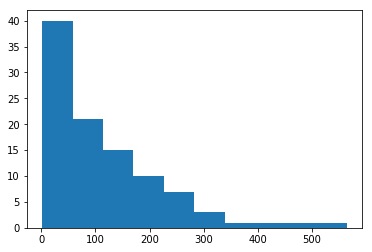

In [7]:
# Show a histogram of the jth column (j between 0 and 14)
j = 9
plt.hist(erv[:,j])
plt.show()

In [ ]:
# show histograms of all 15 columns in a single plot
plt.figure(figsize=(20, 8))
for j in range(1, 16):
    plt.subplot(3,5,j)
    plt.hist(erv[:,j-1])
plt.show()

In [ ]:
# or with color
c = ['orange', 'green', 'red', 'beige', 'brown'
    ,'dimgray', 'firebrick', 'darkkhaki', 'indigo', 'darksalmon'
    ,'forestgreen', 'fuchsia', 'darkcyan', 'darkviolet','darkgoldenrod'
    ]
plt.figure(figsize=(20, 8))
for j in range(15):
    plt.subplot(3,5,j+1)
    plt.hist(erv[:,j], color=c[j])
plt.show()

In [ ]:
# Scatter plot of column col1 vs column col2
col1 = 0
col2 = 14
plt.scatter(erv[:, col1], erv[:, col2]);

In [ ]:
plt.scatter?